In [1]:
### Cargamos iris 

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_DF = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_DF['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

iris_DF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
## Gaussian Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train,X_test,y_train,y_test=train_test_split(iris_DF[['sepal length (cm)',
                                                        'sepal width (cm)', 
                                                        'petal length (cm)', 
                                                        'petal width (cm)']],
                                            iris_DF['species'],
                                               test_size=0.2, 
                                               random_state=42)

In [9]:
### Ajustamos el modelo con los datos

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [10]:
gnb.class_count_

array([40., 41., 39.])

In [11]:
gnb.class_prior_

array([0.33333333, 0.34166667, 0.325     ])

In [12]:
gnb.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [13]:
gnb.theta_

array([[4.99      , 3.4525    , 1.45      , 0.245     ],
       [5.9195122 , 2.77073171, 4.24146341, 1.32195122],
       [6.53333333, 2.96666667, 5.52051282, 2.        ]])

In [15]:
### Evaluamos el modelo

y_pred = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


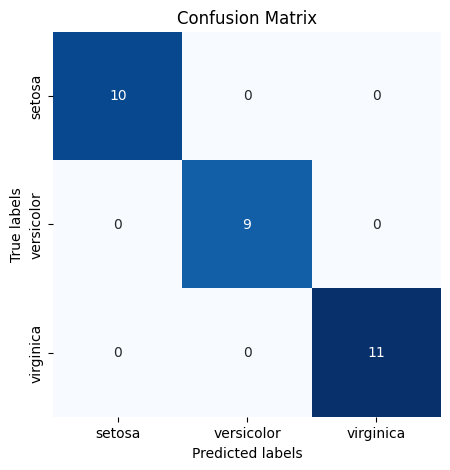

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

ax, fig = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(iris.target_names)
ax.yaxis.set_ticklabels(iris.target_names)

plt.show()


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
y_pred_proba= gnb.predict_proba(X_test)

## Curva ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label='virginica')
fprr, tprr, thresholdsr = roc_curve(y_test, y_pred_proba[:,0], pos_label='setosa')
fprrr, tprrr, thresholdsrr = roc_curve(y_test, y_pred_proba[:,2], pos_label='versicolor')

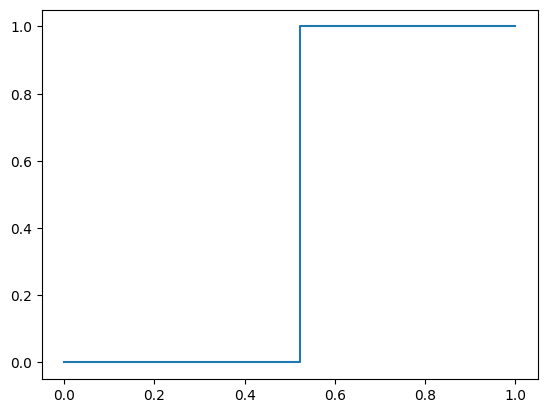

In [33]:
### plot ROC curve

plt.plot(fprrr, tprrr, label='ROC curve versicolor')

In [28]:
thresholds

array([           inf, 9.99982769e-01, 6.02930476e-01, 4.92947614e-12,
       2.04863718e-17])

In [29]:
y_pred_proba[:,1]

array([9.95635767e-01, 4.96158126e-14, 4.92947614e-12, 9.77593559e-01,
       8.70022596e-01, 1.73180181e-13, 9.99955645e-01, 1.18219872e-06,
       9.92158276e-01, 9.99938983e-01, 5.88867020e-04, 2.04863718e-17,
       4.22431128e-17, 5.31248651e-17, 8.92960033e-17, 6.02930476e-01,
       5.05656256e-07, 9.99982769e-01, 9.98040608e-01, 2.94971181e-06,
       5.98122647e-16, 9.89169319e-02, 1.43755981e-13, 1.83103291e-05,
       1.64396056e-09, 1.37161759e-06, 6.28437300e-04, 1.36528257e-08,
       2.08539921e-15, 1.31930917e-15])

In [34]:
y_pred_proba[:,2]

array([4.36423302e-03, 6.54922363e-21, 1.00000000e+00, 2.24064412e-02,
       1.29977404e-01, 3.66170159e-21, 4.43550046e-05, 9.99998818e-01,
       7.84172366e-03, 6.10171853e-05, 9.99411133e-01, 4.73585098e-25,
       1.86022566e-24, 1.85939976e-24, 4.55408899e-24, 3.97069524e-01,
       9.99999494e-01, 1.72305837e-05, 1.95939244e-03, 9.99997050e-01,
       1.63332320e-23, 9.01083068e-01, 2.80756525e-21, 9.99981690e-01,
       9.99999998e-01, 9.99998628e-01, 9.99371563e-01, 9.99999986e-01,
       1.67773682e-23, 3.02915134e-23])

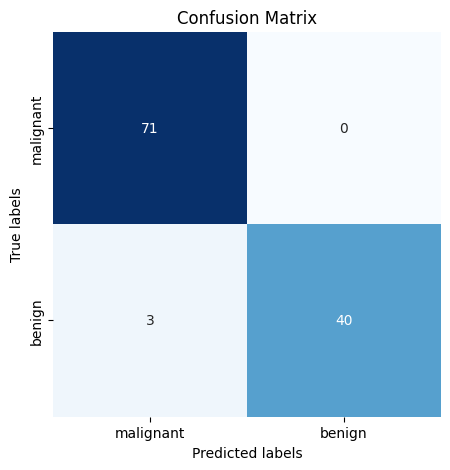